# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para entendê-la melhor, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np  # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time


if __name__ == '__main__':
                       
    # importa o arquivo e guarda em um dataframe do Pandas
    set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
    set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
    set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False) 

    # Concatena os datasets em somente um
    frames = [ set3_dataset ]
    input_dataset = pd.concat(frames, axis=1)
    

    # Concatena as classes junto ao dataframe de atributos
    train_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',')
    input_dataset['classe'] = np.nan
    input_dataset.loc[train_dataset['Id'].values,'classe'] = train_dataset['Class'].values

    print('Dados concatenados produzindo um total de %d atributos' % 
            input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].shape[1])
    
    print('O número de amostras com classificação válida é: %d' % 
            input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].shape[0])

    print('Dados de treinamento carregados com sucesso!')

    test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',')

    print('Dados de teste carregados com sucesso!')
   
    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Dados concatenados produzindo um total de 150 atributos
O número de amostras com classificação válida é: 4310
Dados de treinamento carregados com sucesso!
Dados de teste carregados com sucesso!


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário)

Preenchendo arrays a partir dos datasets de entrada com dados cuja a classe é definida
X (60842, 148)
y (60842, 1)
Removendo atributos com baixa variância....................................
Atributos removidos por baixa variância: 1
Removendo atributos com baixa variância....................................
Atributos removidos por baixa variância: 7
Balanceando amostras das classes: Antes: -1=4038 1=272
Balanceando amostras das classes: Depois: -1=4038 1=4038
(8076, 140) (8076,)
Separando a base em treino e teste
3230
3230
808
808
(6460, 10)
(6460,)
Imprimindo projeção em PCA.........................................


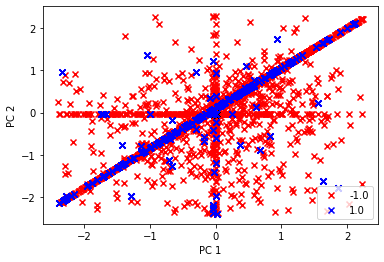

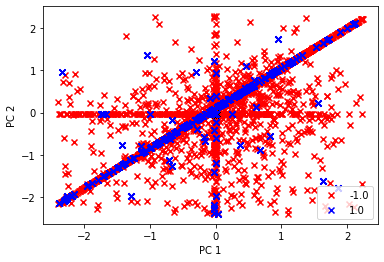

Imprimindo boxplot dos atributos.......................................


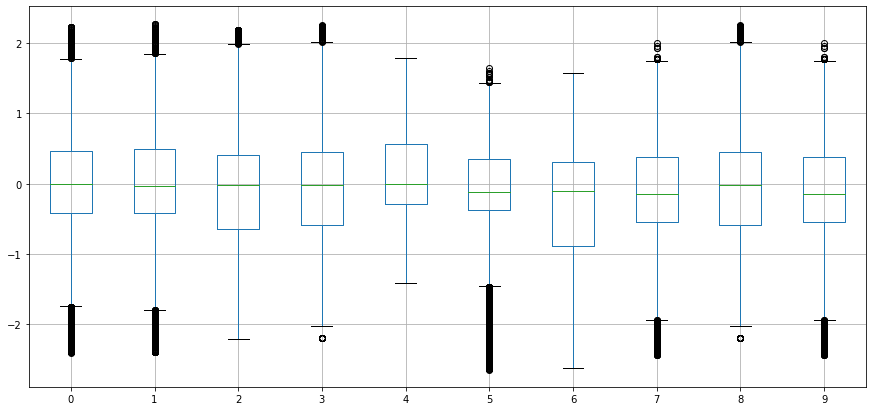

3230
0
3230

Dimensao de X_train:  (6460, 10)

Dimensao de X:  (8076, 10)

Dimensao de y_train:  (6460,)

Dimensao de y:  (8076,)

Classes do problema:  [-1.  1.]

Classes do problema:  [-1.  1.]


In [28]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.ensemble import RandomForestClassifier
import utils


if True:
    print('Preenchendo arrays a partir dos datasets de entrada com dados cuja a classe é definida')
    X = input_dataset.drop('classe', axis=1).drop('Id', axis=1).values
    y = input_dataset[['classe']].values
    print('X',X.shape)
    print('y',y.shape)

    print('Removendo atributos com baixa variância....................................')
    variance_mask = VarianceThreshold().fit(X).get_support()
    X = X[:,variance_mask]
    print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))

    #print('Removendo atributos com alta correlação....................................')
    #X, corr_mask = utils.remove_correlated(X, 0.95)
    #print('Atributos removido por alta correlação: %d' % len(corr_mask))
    
    X = utils.clean_dataset(X)

    #print('Removendo outliers..................................')
    #z = np.abs(stats.zscore(X))
    #z = np.nan_to_num(z)
    #print('Amostras mantidas: %d de %d' % (np.sum((z < 3).all(axis=1)), X.shape[0]))
    #X = X[(z < 3).all(axis=1)]
    
    #print('Scaling scale between 0 and 1..................................')
    X = RobustScaler().fit_transform(X)
    #X = MinMaxScaler().fit_transform(X)
    K = X[test_dataset.iloc[:,:].values.T[0]]
    
    print('Removendo atributos com baixa variância....................................')
    variance_mask = VarianceThreshold().fit(X).get_support()
    X = X[:,variance_mask]
    K = K[:,variance_mask]
    print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))
    
    
    
    #Xsemi = input_dataset.loc[(input_dataset['classe'] != -1) & (input_dataset['classe'] != 1) & (input_dataset['classe'] != 0)].drop('classe', axis=1).drop('Id', axis=1).values
    #print((y.T[0]!=1)|(y.T[0]!=-1)|(y.T[0]!=0))
    #Xsemi = X[(y.T[0]!=1)|(y.T[0]!=-1)|(y.T[0]!=0)]

    print('Balanceando amostras das classes: Antes: -1=%d 1=%d' % (np.sum(y==-1), np.sum(y==1)))
    X,y = utils.balance_classes(X,y)
    print('Balanceando amostras das classes: Depois: -1=%d 1=%d' % (np.sum(y==-1), np.sum(y==1)))
    
    
    
    #mask = ((y == -1) | (y == 1))
    #X = X[mask]
    #y = y[mask]
    
    X = utils.clean_dataset(X)
    
    print(X.shape, y.shape)
    print('Separando a base em treino e teste')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    print(np.sum(y_train==1))
    print(np.sum(y_train==-1))
    print(np.sum(y_test==1))
    print(np.sum(y_test==-1))
    
    selector = SelectKBest(f_classif, k=10).fit(X_train,y_train)
    X_train = selector.transform(X_train)
    X_test = X_test[:,selector.get_support()]
    selector = SelectKBest(f_classif, k=10).fit(X,y)
    X = selector.transform(X)
    K = K[:,selector.get_support()]
    
    #cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
    #print('Extraindo os melhores atributos dentre os %d atributos de X_train.' % X_train.shape[1])
    #estimator = DecisionTreeClassifier()
    #selector = RFECV(estimator, step=1, cv=cv)
    #selector = selector.fit(X_train, y_train)
    #print(selector.support_)
    #X_train = X_train[:,selector.support_]
    #X_test = X_test[:,selector.support_]
    #Xsemi = Xsemi[:,selector.support_]
    #print('Número de atributos restantes após a operação: %d' % X_train.shape[1])
    #print('Extraindo os melhores atributos dentre os %d atributos de X.' % X.shape[1])
    #estimator = DecisionTreeClassifier()
    #selector = RFECV(estimator, step=1, cv=cv)
    #selector = selector.fit(X, y)
    #print(selector.support_)
    #X = X[:,selector.support_]
    #K = K[:,selector.support_]
    #print('Número de atributos restantes após a operação: %d' % X.shape[1])

    #print('Adding semi supervising samples ......................................')
    #X_train = np.concatenate((X_train, Xsemi[0:15000]))
    #y_train = np.concatenate((y_train, np.full(15000, np.inf)))
    #y_train = np.where(y_train==-1, 0, y_train)
    #y_train = np.where(y_train==np.inf, -1, y_train)
    #label_prop_model = LabelSpreading()
    #y_train = label_prop_model.fit(X_train, y_train).predict(X_train)
    #y_train = np.where(y_train==0, -1, y_train)

    #print(X_train.shape)
    #print(y_train.shape)
    #np.savetxt("Xtrain.csv", np.append(X_train, y_train[:,None], 1), delimiter=",")
    
    
    print(X_train.shape)
    print(y_train.shape)
    print('Imprimindo projeção em PCA.........................................')
    pca = PCA(2)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(X_train)
    colors = ['r', 'b']
    markers = ['x', 'x']
    for l, c, m in zip(np.unique(y_train), colors, markers):
        plt.scatter(X_train[y_train==l, 0], 
                    X_train[y_train==l, 1], 
                    c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower right')
    plt.show()

    pca = PCA(2)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(X)
    colors = ['r', 'b']
    markers = ['x', 'x']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], 
                    X[y==l, 1], 
                    c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower right')
    plt.show()

    print('Imprimindo boxplot dos atributos.......................................')
    df = pd.DataFrame(data=X)
    df.boxplot(figsize=(15,7))
    plt.show()
       

    print(np.sum(y_train==1))
    print(np.sum(y_train==0))
    print(np.sum(y_train==-1))


    print('\nDimensao de X_train: ', X_train.shape)
    print('\nDimensao de X: ', X.shape)

    print('\nDimensao de y_train: ', y_train.shape)
    print('\nDimensao de y: ', y.shape)

    print('\nClasses do problema: ', np.unique(y_train))
    print('\nClasses do problema: ', np.unique(y))


    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

    time.sleep(0.5)

    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))
    
#except Exception as e:
#    print(e)
#    duration = 1.5  # seconds
#    freq = 880  # Hz
#    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

--------------------------------------------------------------------------------------------------
SVM Train: 0.5984520123839009
SVM Accuracy: 0.5866336633663366
SVM AUC: 0.607907619351044
              precision    recall  f1-score   support

        -1.0       0.58      0.63      0.60       808
         1.0       0.59      0.54      0.57       808

    accuracy                           0.59      1616
   macro avg       0.59      0.59      0.59      1616
weighted avg       0.59      0.59      0.59      1616

[[508 300]
 [368 440]]
Cross Accuracy: 0.592 (0.009)------------------
Printing model to submission.csv.............................................
.............................................................................
--------------------------------------------------------------------------------------------------
LR Train: 0.5976780185758513
LR Accuracy: 0.5853960396039604
LR AUC: 0.6120570287226743
              precision    recall  f1-score   support

        -1.0   

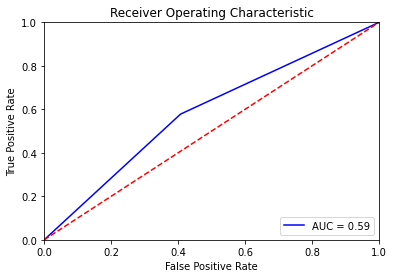

--------------------------------------------------------------------------------------------------
RR Train: 0.6595975232198142
RR Accuracy: 0.6441831683168316
RR AUC: 0.7029679994608371
              precision    recall  f1-score   support

        -1.0       0.61      0.83      0.70       808
         1.0       0.73      0.46      0.57       808

    accuracy                           0.64      1616
   macro avg       0.67      0.64      0.63      1616
weighted avg       0.67      0.64      0.63      1616

[[667 141]
 [434 374]]
Cross Accuracy: 0.654 (0.005)------------------


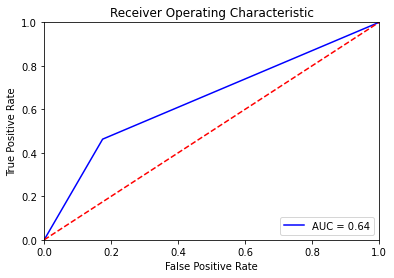

--------------------------------------------------------------------------------------------------
SVM Train: 0.5984520123839009
SVM Accuracy: 0.5866336633663366
SVM AUC: 0.607907619351044
              precision    recall  f1-score   support

        -1.0       0.58      0.63      0.60       808
         1.0       0.59      0.54      0.57       808

    accuracy                           0.59      1616
   macro avg       0.59      0.59      0.59      1616
weighted avg       0.59      0.59      0.59      1616

[[508 300]
 [368 440]]
Cross Accuracy: 0.592 (0.009)------------------


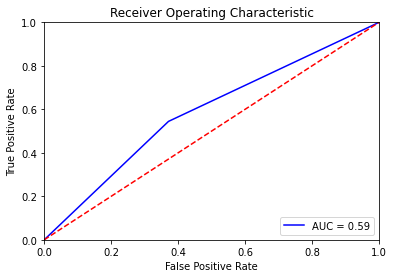

--------------------------------------------------------------------------------------------------
KNN Train: 0.9360681114551084
KNN Accuracy: 0.9090346534653465
SVM AUC: 0.9580134606901284
[[661 147]
 [  0 808]]
Cross Accuracy: 0.905 (0.007)------------------


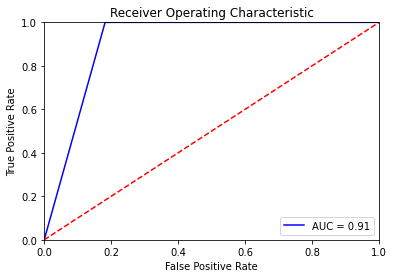

--------------------------------------------------------------------------------------------------
NN Train: 0.904953560371517
NN Accuracy: 0.8849009900990099
SVM AUC: 0.9391082982060582
              precision    recall  f1-score   support

        -1.0       0.92      0.84      0.88       808
         1.0       0.85      0.93      0.89       808

    accuracy                           0.88      1616
   macro avg       0.89      0.88      0.88      1616
weighted avg       0.89      0.88      0.88      1616

[[680 128]
 [ 58 750]]
Cross Accuracy: 0.877 (0.022)------------------


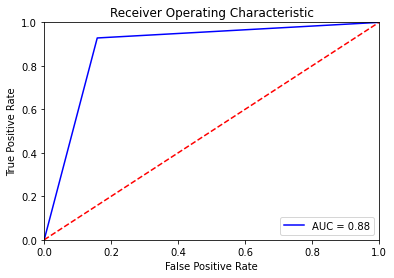

0

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt

   
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

print('--------------------------------------------------------------------------------------------------')
model = svm.SVC(kernel='linear', class_weight='balanced', probability=True,random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("SVM Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

print('Printing model to submission.csv.............................................')
y_pred = model.fit(X, y).predict(K)
y_pred_submission = model.fit(X, y).predict_proba(K)[:,1]
result = np.zeros((K.shape[0],2))
for i in range(K.shape[0]):
    result[i][0] = test_dataset.iloc[:,:].values.T[0][i]
    result[i][1] = y_pred_submission[i]
resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])
resultdf['Id'] = resultdf['Id'].astype(int)
resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)
resultdf.to_csv('submission.csv', index=False, float_format='%.5f')
print('.............................................................................')


print('--------------------------------------------------------------------------------------------------')
model = LogisticRegression(random_state=1, max_iter=15000)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("LR Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("LR AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, cv=cv)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(model, X_train, y_train, cv=cv)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('--------------------------------------------------------------------------------------------------')
model = RandomForestClassifier(max_depth=2, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("RR Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("RR Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("RR AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print('--------------------------------------------------------------------------------------------------')
#model = MultinomialNB()
#y_pred = model.fit(X_train, y_train).predict(X_train)
#print("MNB Train:",metrics.accuracy_score(y_train, y_pred))
#y_pred = model.fit(X_train, y_train).predict(X_test)
#print("MNB Accuracy:",metrics.accuracy_score(y_test, y_pred))
#y_proba = model.fit(X_train, y_train).predict_proba(X_test)
#print("MNB AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
##print(classification_report(y_test, y_pred))
##plot_confusion_matrix(model, X_test, y_test)
##plt.show()
#print(confusion_matrix(y_test, y_pred))
#scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

#fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
#roc_auc = metrics.auc(fpr, tpr)
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()


print('--------------------------------------------------------------------------------------------------')
model = svm.SVC(kernel='linear', probability=True,random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("SVM Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))



fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




print('--------------------------------------------------------------------------------------------------')
if True:    
    model = KNeighborsClassifier()
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("KNN Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
    #print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test, y_pred))
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('--------------------------------------------------------------------------------------------------')
    model = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(300,), random_state=1, max_iter=5000, )
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("NN Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("NN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
    print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test, y_pred))
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))



---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos